## HW2

   ### include libraries

In [319]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np


### import dataset

In [104]:
players = pd.read_json('dataset/players.json', orient = 'record')
teams = pd.read_json('dataset/teams.json', orient = 'record')
coaches = pd.read_json('dataset/coaches.json', orient = 'record')
premier_league_events = pd.read_json('dataset/events/events_England.json', orient = 'record')
premier_league_matches = pd.read_json('dataset/matches/matches_England.json', orient = 'record')

### RQ1

    we need the matches results for each team
    dataset: premier_laegue_matches join teams

In [308]:
# associate the teamId to the teamName -> this code must be written into a function in the file functions.py
premier_league_matches_sorted_by_week = premier_league_matches.sort_values(by=['gameweek'], ascending=True)
premier_league_by_week = {}
teams_list = []
gameweek_list = []
for index, match in premier_league_matches_sorted_by_week.iterrows():
    gameweek = match['gameweek']
    teamsData = match['teamsData']
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
    for key in teamsData:
        if teamsData[key]['side'] == 'home':
            home_id = int(key)
            home_score = teamsData[key]['score']
        else:
            away_id = int(key)
            away_score = teamsData[key]['score']
    previous_points_home = 0
    previous_points_away = 0
    if gameweek > 1:
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
    if home_score > away_score:
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]
    away_name = teams[teams["wyId"] == away_id].name.values[0]
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    
    
    

    create a dictionary with all teams 
    and points for all gameweeks

In [338]:
dict_points = {}
for index,week in premier_league_by_week.items():
    for key, team in week.items():
        if index == 1:
            dict_points[team['team_name']] = []
            dict_points[team['team_name']].append(team['points'])
        else:
            dict_points[team['team_name']].append(team['points'])


    plot with gameweeks and points for each team

/Users/antonio/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


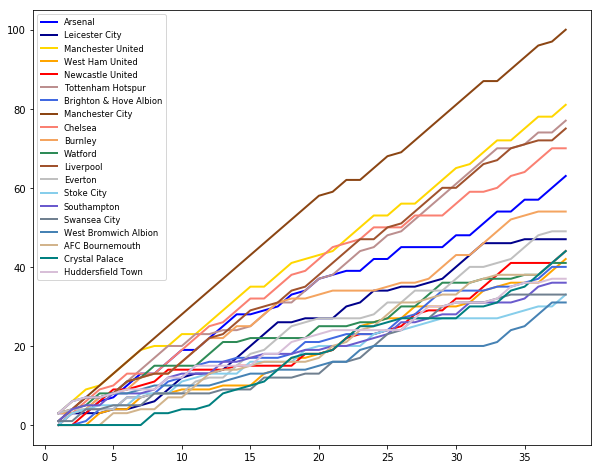

In [341]:
color_names = [
'blue', 'darkblue','gold', 'orange','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown','seagreen','sienna','silver','skyblue','slateblue','slategray',
'steelblue','tan','teal','thistle','tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen']


fontP = FontProperties()
fontP.set_size('small')
fig=plt.figure(figsize=(10,8))
fig.show()
ax=fig.add_subplot(111)
i = 0
for key, el in dict_points.items():
    ax.plot(gameweek_list,list(el) ,c= color_names[i],ls='-',label=key, linewidth=2)
    i +=1
plt.legend(prop=fontP)

### RQ2

    we need the matches results for each team
    dataset: premier_laegue_matches join teams    

### RQ3

    we need the team for each coach
    dataset: coaches join teams

### RQ4

    we need ratio between completed passes and attempted passes for each player
    dataset: events join players, group by players

### RQ5

    we need correlation between air duels and height of the players
    dataset: events join players, group by players